In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [48]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [49]:
df.shape

(962, 2)

- Explore Categories

In [50]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


<ipython-input-51-8b7dce67814e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Category'] , palette = 'hls')


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

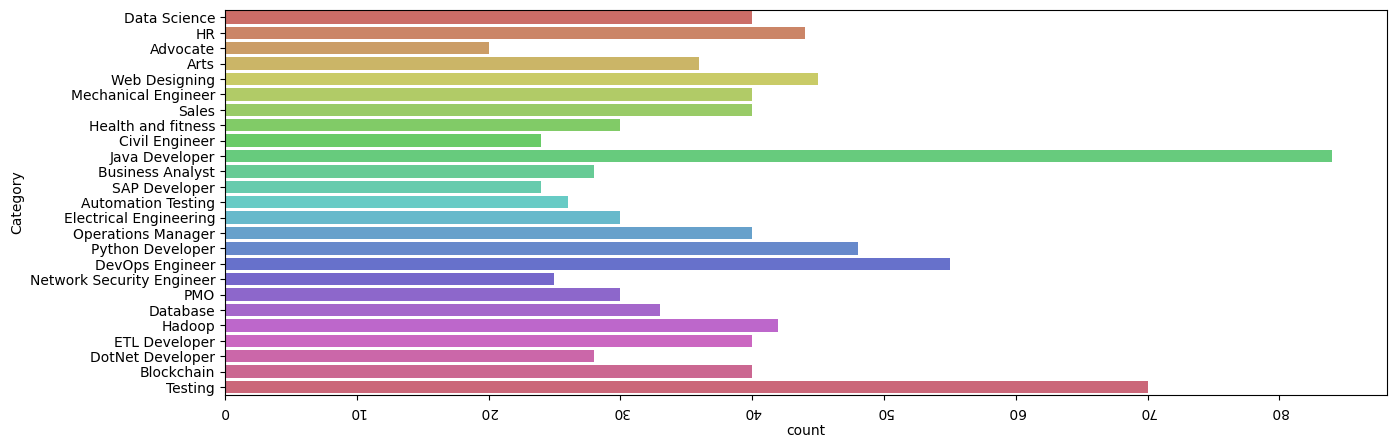

In [51]:
plt.figure(figsize = (15 , 5))
sns.countplot(df['Category'] , palette = 'hls')
plt.xticks(rotation = 180)

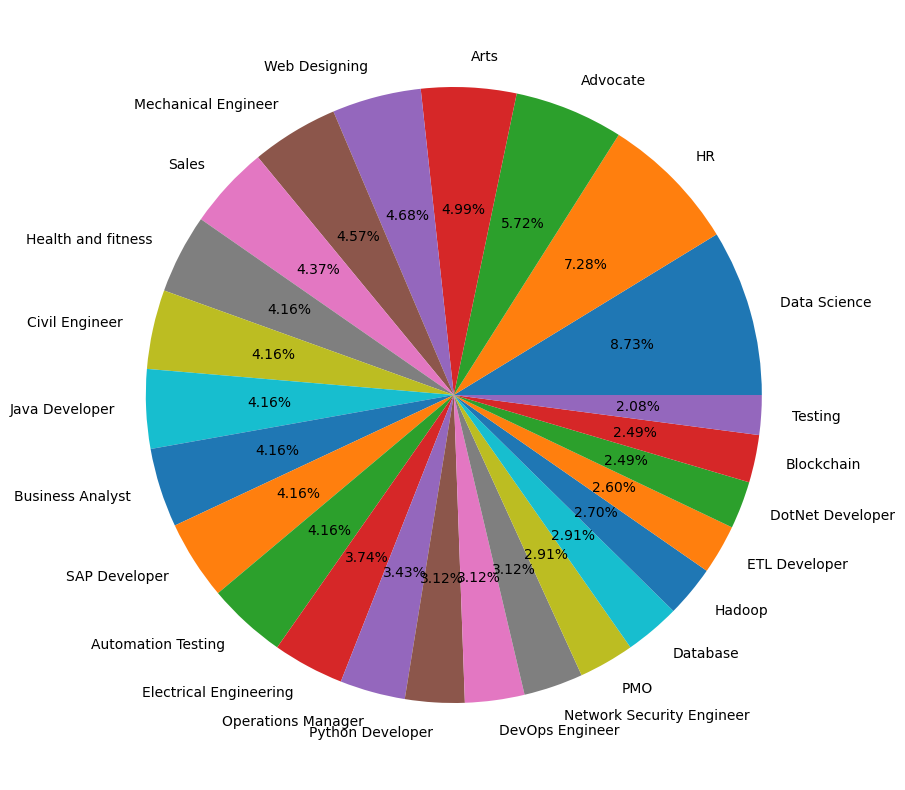

In [52]:
counts = df['Category'].value_counts()
lables = df['Category'].unique()

plt.figure(figsize = (25 , 10))
plt.pie(counts , labels = lables , autopct = '%1.2f%%')
plt.show()

- Explore resume

In [53]:
df['Category'][0]

'Data Science'

In [54]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning Data
- 1. URLs
- 2. hashtags,
- 3. mentions,
- 4. specials letters,
- 5. punctuations


In [55]:
import re

def CleanResume(text):
  cleanTxt = re.sub('http\S+\s', ' ',  text)
  cleanTxt = re.sub('RT|cc', ' ',  cleanTxt)
  cleanTxt = re.sub('#\S+\s', ' ',  cleanTxt)
  cleanTxt = re.sub('@\S+', ' ',  cleanTxt)
  cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ',  cleanTxt)
  cleanTxt = re.sub(r'[^\x00-\x7f]', ' ',  cleanTxt)
  cleanTxt = re.sub('\s+', ' ',  cleanTxt)
  return cleanTxt

In [56]:
CleanResume("Hello this is $$ $ #sunny kunal sharma http://iamdevil @gamil.com and i am from hell")

'Hello this is kunal sharma and i am from hell'

In [57]:
df['Resume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [58]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [61]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


## Vectorization

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [63]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [64]:
requiredText

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

# Splitting

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train , X_test , y_train ,  y_test = train_test_split(requiredText , df['Category'] , test_size = 0.2 , random_state = 42)

# Now train your model

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train , y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test , ypred))

0.9844559585492227


## Website making

In [68]:
import pickle
pickle.dump(tfidf , open('tfidf.pkl' , 'wb'))
pickle.dump(clf , open('clf.pkl' , 'wb'))

In [69]:
import pickle

clf = pickle.load(open('/content/clf.pkl' , 'rb'))
tfidf = pickle.load(open('/content/tfidf.pkl' , 'rb'))